### Decision Tree
This notebook implements a Decision Tree classifier from sklearn. Decision trees can be used for classification and regression; here we focus only on classification.

We do not need to transform or otherwise perform the level of data preparation we have to do with other ML algorithms when using a Decision Tree model. This uses sklearn to implement a decision tree on the diabetes dataset.

For additional information on decision trees in machine learning, refer here:
- https://en.wikipedia.org/wiki/Decision_tree_learning

We import pandas, sklearn, train_test_split and the tree library option. We also import graphviz to render the explanation for the decision paths in the decision tree as it constructs the model and fits to the dataset. This is very useful for explaining the model to stakeholders and why it is making a decision on a feature. Some ML model types lack such explainability in their inner workings, for example, deep learning models are often referred to as black boxes.

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib import pyplot

#### Exploratory Data Analysis
We use the diabetes dataset. For information about this dataset, refer to the Kaggle dataset library summary:
- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

This will predicte whether a patient does or does not have diabetes. We have multiple predictor variables and one target variable - Outcome.

In [2]:
diabetes_df = pd.read_csv("../datasets/diabetes.csv")

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.shape

(768, 9)

In [6]:
diabetes_df.size

6912

In [7]:
diabetes_df.ndim

2

In [8]:
# The .T at the end displays the transpose i.e. we flip the columns to be the rows and rows become the columns
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
diabetes_df.sample(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
636,5,104,74,0,0,28.8,0.153,48,0
722,1,149,68,29,127,29.3,0.349,42,1
714,3,102,74,0,0,29.5,0.121,32,0
336,0,117,0,0,0,33.8,0.932,44,0
568,4,154,72,29,126,31.3,0.338,37,0


Verify if any null values in the dataframe for a given data column.

In [10]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
diabetes_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

The following calculates the pairwise correlation of columns. It does not include NA/null values.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [14]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Produce data visualization histogram plots for the pandas dataframe for the diabetes dataset and focus on the input feature distributions as we are going to scale the input data before training the model.

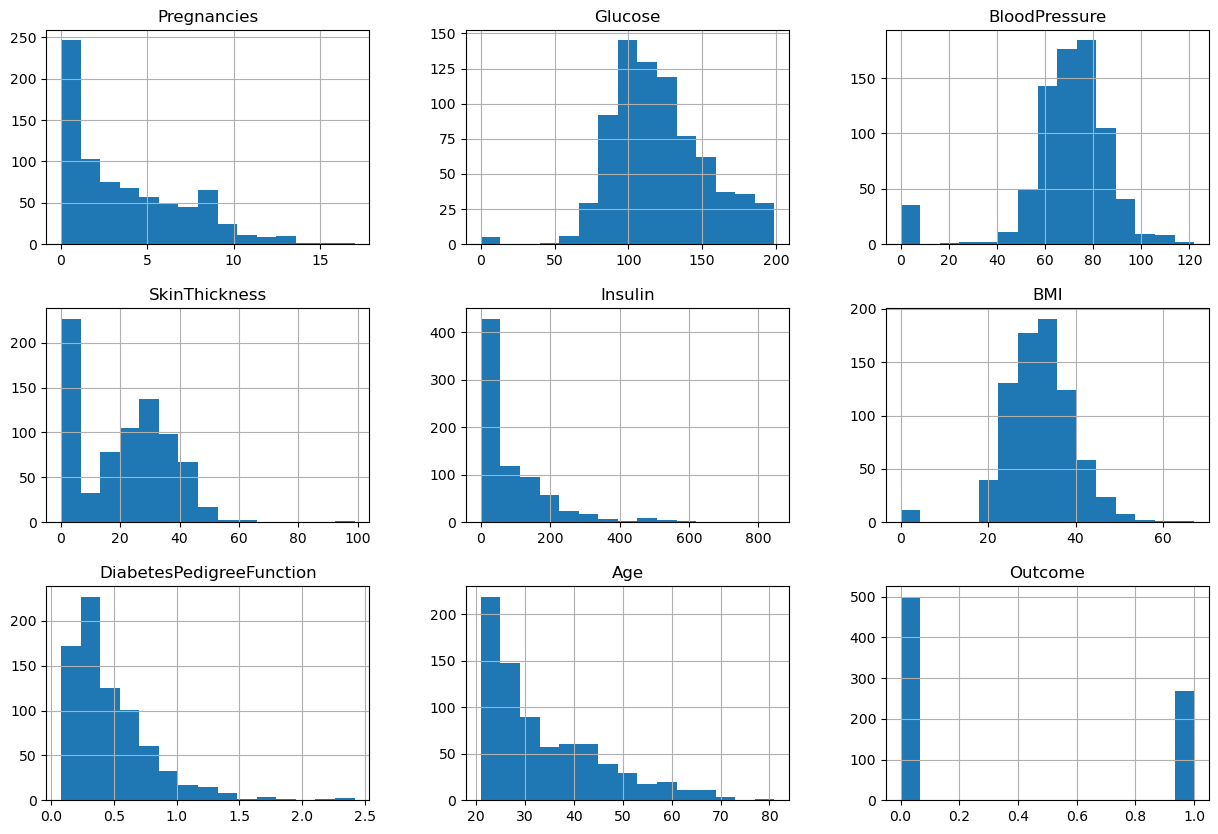

In [15]:
# Get histogram for each numeric variable - 9 variables so layout = 3x3
features_including_output_label = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_df[features_including_output_label].hist(bins=15, figsize=(15, 10), layout=(3, 3));

##### Create a train:test split on the dataset
Next, we define our train:test split using sklearn library. This lets us defined our supervised learning training set and a holdout test data subset. We will use a 33% portion of the dataset as a test set. We will use this to test the accuracy of the ML model on data it has not seen before in training and if it has overfit during training or can generalize to unseen data.

In [16]:
# split into features and categorical predictor variable (0 or 1)
X = diabetes_df.iloc[: , :8]
y = diabetes_df.iloc[: , -1]

# split into train and test sets with sklearn native train_test_split 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [17]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
738,2,99,60,17,160,36.6,0.453,21
498,7,195,70,33,145,25.1,0.163,55
76,7,62,78,0,0,32.6,0.391,41
177,0,129,110,46,130,67.1,0.319,26
713,0,134,58,20,291,26.4,0.352,21
...,...,...,...,...,...,...,...,...
544,1,88,78,29,76,32.0,0.365,29
242,3,139,54,0,0,25.6,0.402,22
592,3,132,80,0,0,34.4,0.402,44
339,7,178,84,0,0,39.9,0.331,41


In [18]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
687,1,107,50,19,0,28.3,0.181,29
194,8,85,55,20,0,24.4,0.136,42
251,2,129,84,0,0,28.0,0.284,27
385,1,119,54,13,50,22.3,0.205,24
113,4,76,62,0,0,34.0,0.391,25
...,...,...,...,...,...,...,...,...
550,1,116,70,28,0,27.4,0.204,21
676,9,156,86,0,0,24.8,0.230,53
655,2,155,52,27,540,38.7,0.240,25
199,4,148,60,27,318,30.9,0.150,29


In [19]:
X_train.shape

(691, 8)

In [20]:
X_test.shape

(77, 8)

##### Machine Learning Model and Training
Construct a Decision Tree classifier using sklearn. Use gini impurity function as the criterion attribute in this example. Entropy can be used as alternative method. Refer to this thread on why you might use one or the other:
- https://datascience.stackexchange.com/questions/10228/when-should-i-use-gini-impurity-as-opposed-to-information-gain-entropy
- https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf

In [21]:
# used both gini and entropy for the criterion; similar results for both
diabetes_ml_model_dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=5)

In [22]:
diabetes_ml_model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

##### Decision Tree Model: Run Predictions, Evaluate Performance
We now run the predictive analytics against the test dataset and calculate the accuracy of the ML model when predicting on new data, our test dataset.

In [23]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
687,1,107,50,19,0,28.3,0.181,29
194,8,85,55,20,0,24.4,0.136,42
251,2,129,84,0,0,28.0,0.284,27
385,1,119,54,13,50,22.3,0.205,24
113,4,76,62,0,0,34.0,0.391,25
...,...,...,...,...,...,...,...,...
550,1,116,70,28,0,27.4,0.204,21
676,9,156,86,0,0,24.8,0.230,53
655,2,155,52,27,540,38.7,0.240,25
199,4,148,60,27,318,30.9,0.150,29


Run predictions using the Decision Tree model on the diabetes test dataset created earlier.

In [24]:
y_pred = diabetes_ml_model_dt.predict(X_test)

Export the decision tree graph to PDF file. This lets us report to stakeholders in an easy manner and shows the Gini impurity calculations and outputs per feature and left-right tree path.

In [25]:
dot_data_diabetes_ml_model_graph = tree.export_graphviz(diabetes_ml_model_dt, out_file=None)

In [26]:
graph = graphviz.Source(dot_data_diabetes_ml_model_graph)

The next cell will generated a file called "diabetes.pdf" on the file system in same location as this notebook.

In [27]:
graph.render("diabetes") 

'diabetes.pdf'

Create a graph of the decision tree directly here in the Jupyter Notebook using graph libraries per sklearn API documentation example. We will use the feature names derived from the columns and from X_diabetes earlier as an input to the graph library for tree.export_graphviz.

In [28]:
diabetes_feature_names = X.columns

In [29]:
diabetes_feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [30]:
dot_data_diabetes_ml_model_web = tree.export_graphviz(diabetes_ml_model_dt, 
                                out_file=None, 
                                feature_names=diabetes_feature_names, 
                                filled=True, 
                                rounded=True, 
                                special_characters=True)

In [31]:
web_graph = graphviz.Source(dot_data_diabetes_ml_model_web)

The following graph will visualize the decision tree directly in the notebook, so you can see how it is calculating the split point.

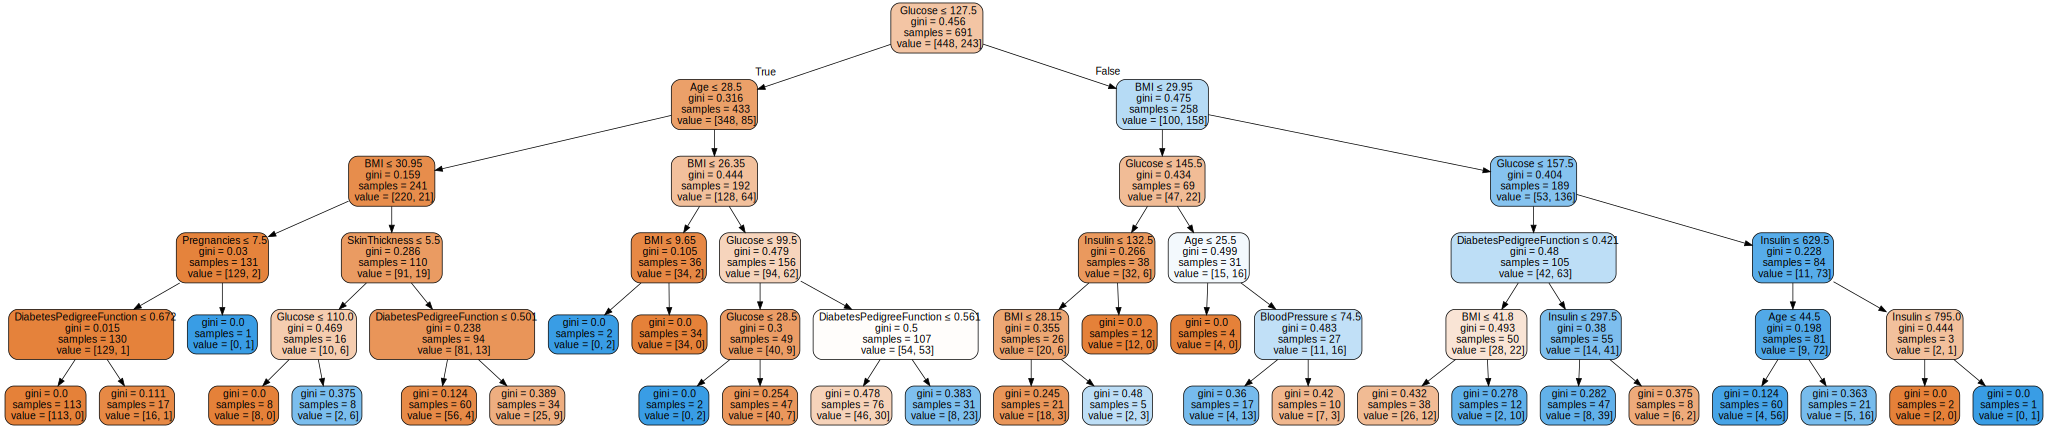

In [32]:
web_graph

Include the sklearn classification report for precision, recall, f1-score, and support metrics.

In [33]:
metrics = classification_report(y_test, y_pred, output_dict=False)
print(metrics)

              precision    recall  f1-score   support

           0       0.79      0.88      0.84        52
           1       0.68      0.52      0.59        25

    accuracy                           0.77        77
   macro avg       0.74      0.70      0.71        77
weighted avg       0.76      0.77      0.76        77



In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[46,  6],
       [12, 13]])

Below is a useful sklearn confusion matrix display utility plot. I always refer to it ever I need to check the array dimensions for true label, predicted labels. Seaborn is used later for an alternative display plot with text labels.

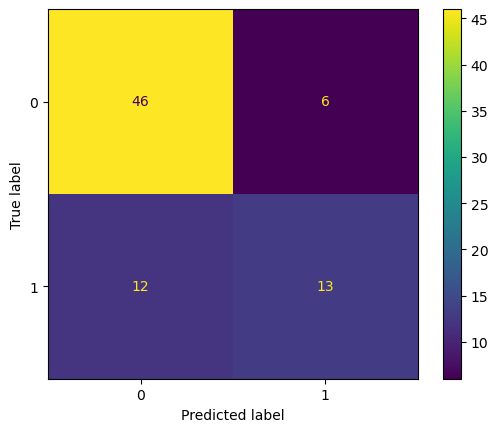

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
ConfusionMatrixDisplay(cm).plot()

<AxesSubplot:>

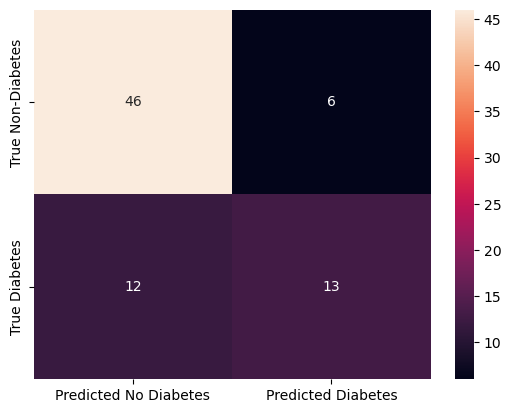

In [36]:
df_confusion_matrix = pd.DataFrame(cm, ['True Non-Diabetes', 'True Diabetes'],
                     ['Predicted No Diabetes', 'Predicted Diabetes'])

sns.heatmap(df_confusion_matrix, annot=True, fmt='g')

#### Web Reference
- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html